### ПРИЛОЖЕНИЕ. ЛИНЕЙНЫЕ МОДЕЛИ.  ОСНОВЫ РЕГРЕССИОННОГО АНАЛИЗА.ПРИМЕНЕНИЕ НОРМАЛЬНОГО УРАВНЕНИЯ К ЗАДАЧАМ РЕГРЕССИИ.

В данном приложении  рассмотрены различные примеры построения линейных моделей , полиномиальныая регрессия и  нелинейных моделей на основе регрессионного анализа.Изучено нелинейные модели  АПК. С приенением технологий  регрессионного анализа изучены также,вопрос переобученности моделей и построены регуляризованные модели с применением регуляризации А.Н.Тихонова.

In [2]:
from IPython.core.display import HTML
HTML("""
<style>

div.cell { /* Tunes the space between cells */
margin-top:1em;
margin-bottom:1em;
}

div.text_cell_render h5 { /* Main titles bigger, centered */
font-size: 1.1em;
line-height:1.2em;
text-align:center;
}

div.text_cell_render h5 { /*  Parts names nearer from text */
margin-bottom: -0.4em;
}


div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:1.1em;
line-height:1.2em;
padding-left:2em;
padding-right:2em;
}
</style>
""")

# Базовые принципы машинного обучения



## Оглавление

1. Линейная регрессия
* Линейная регрессия в Sklearn
* Байесовый взгляд на линейную регрессию
* Логистическая регрессия

# Машинное обучение

![mlvd](images/Data_Science_VD.png)

![mlvd](images/bengio.png)

* Машинное обучение — это подраздел искусственного интеллекта, в котором изучаются алгоритмы, способные обучаться без прямого программирования того, что нужно изучать.
* *Что значит обучается?*
    * Говорят, что программа обучается на опыте **E** относительно класса задач **T** в смысле меры качества **L**, если при решении задачи **T** качество, измеряемое мерой **L**, возрастает при демонстрации нового опыта **E**.

# Типы задач машинного обучения

## Основные задачи
* *Обучение с учителем* - задача вывода функции $f: X \rightarrow Y$ по заданному размеченному множеству данных; каждый пример является парой вектора признаков объекта и желаемого отклика на него $D = \left\{ \left( x_i, y_i \right) \right\}_{i=1, \ldots, n}$, например целевая переменная может быть:
    * категориальной - задача классификации;
    * непрерывной - задача регрессии;
    * порядковой - задача ранжирования.
        
* *Обучение без учителя* - задача вывода функции, описывающей внутреннюю структуру неразмеченных данных $D = \left\{ x_i \right\}_{i=1, \ldots, n}$
    * кластеризация - задача выявления скрытых групп внутри данных;
    * сжатие размерности - задача уменьшения количества признаков;
    * заполнения пропусков в матрице - задача рекомендаций;
    * частичное обучение - задача обучения с учителем, при условии неограниченного доступа к неразмеченным данным и крайне ограниченным набором размеченных.

* *Обучение с подкреплением* - задача обучения агента принимать оптимальные решения при взаимодействии с окружающей средой;
    * в отличие от обучения с учителем, агент может влиять не только на себя (изменение своих параметров), но и изменять окружение (набор данных не фиксирован, можно например ограбить караван).

## Другие задачи
* *Трансфер знаний* - применение модели обученное для решения одной задачи при решении другой задачи;
* *активное обучение* - задача построения оптимального дизайна эксперимента, когда есть доступ к размеченным и неразмеченным данным, и требуется решить другую задачу машинного обучения, потратив как можно меньше запросов к данным;
* *Онлайн обучение* - потоковое обучение моделей машинного обучения;
* *Мета-обучение* или *обучение обучению*.

# Предиктивная модель

*Предиктивная модель* - это параметрическое семейство функций (гипотез):

$$\large \mathcal{H} = \left\{ h\left(x, \theta\right) | \theta \in \Theta \right\}$$

* где
    * $\large h: X \times \Theta \rightarrow Y$    
    * $\large \Theta$ - множество параметров

# Алгоритм обучения

*Алгоритм обучения* - это отображение из множества данных в множество гипотез:

$$\large \mathcal{M}: X \times Y \rightarrow \mathcal{H}$$

Обычно выделяют два шага при решении задачи обучения с учителем:
1. Обучение, когда выбирается гипотеза: $\large h = \mathcal{M}\left(D\right)$
* Тестирование, когда для заданного примера $\large x$ вычисляется выход модели $\large \hat{y} = h\left(x\right)$

# Минимизация эмпирического риска
*Минимизация эмпирического риска* - это принцип в статистической теории обучения для решения широкого круга задач, включая обучение с учителем, в частности задачи классификации и регрессии.

Введем вещественнозначную функцию (функцию ошибки):
$$\large L: Y \times Y \rightarrow \mathbb{R}$$
с помощью которой будем измерять на сколько отличается прогноз $\large \hat {y}$ от истинного значения целевой переменной $\large y$.

Риском гипотезы $\large h$ будем называть ожидаемое значение функции ошибки по распределению примеров:
$$\large \begin{array}{rcl}Q\left(h\right) &=& \text{E}_{x, y \sim P\left(x, y\right)}\left[L\left(h\left(x\right), y\right)\right] \\
&=& \int L\left(h\left(x\right), y\right) d P\left(x, y\right)
\end{array}$$

К сожалению совместная плотность $\large P\left(x, y\right)$ неизвестна (иначе бы не было и задачи). Но мы можем вычислить аппроксимацию выражения выше как среднее значение функции стоимости по выборке (эмпирический риск):

$$\large Q_{\text{emp}}\left(h\right) = \frac{1}{n} \sum_{i=1}^n L\left(h\left(x_i\right), y_i\right)$$

Согласно принципу мы должны выбрать ту гипотезу, которая минимизирует эмпирический риск:
$$\large \hat{h} = \arg \min_{h \in \mathcal{H}} Q_{\text{emp}}\left(h\right)$$

Примеры функций ошибки:
* классификация: $\large L\left(\hat{y}, y\right) = \text{I}\left[\hat{y} = y\right]$
* регрессия: $\large L\left(\hat{y}, y\right) = \left(\hat{y} - y\right)^2$

# Обобщение

Главным недостатком принципа минимизации эмпирического риска является переобучение:

* мы говорим, что модель обладает *обобщающей способностью* если вероятность ошибки на тестовом множестве данных (такое множество примеров, которое не участвовало в обучении ни в каком виде) мала или прогнозируема;
* *переобучение* провляется в том, что модель показывает хорошие результаты на обучающем множестве и плохие на тестовом. Такие модели не обладают обобщающей способностью.

# Линейная регрессия

Ограничим пространство гипотез множеством линейных функций от аргумента размерности $\large \left(m + 1\right)$, смещение и один параметр на каждый признак ($\large x_0 = 1$):

$$\large \begin{array}{rcl} \forall h \in \mathcal{H}, h\left(\vec{x}\right) &=& w_0 x_0 + w_1 x_1 + w_2 x_2 + \cdots + w_m x_m \\
&=& \sum_{i=0}^m w_i x_i \\
&=& \vec{x}^T \vec{w}
\end{array}$$
где:
* $\large \vec{x} \in \mathbb{R}^{m + 1}$

Тогда эмпирический риск принимает вид среднеквадратичной ошибки:
$$\large \begin{array}{rcl}\mathcal{L}\left(X, \vec{y}, \vec{w} \right) &=& \frac{1}{2n} \sum_{i=1}^n \left(y_i - \vec{x}_i^T \vec{w}_i\right)^2 \\
&=& \frac{1}{2n} \left\| \vec{y} - X \vec{w} \right\|_2^2 \\
&=& \frac{1}{2n} \left(\vec{y} - X \vec{w}\right)^T \left(\vec{y} - X \vec{w}\right)
\end{array}$$
где:
* $\large \vec{w} \in \mathbb{R}^{m + 1}$
* $\large \vec{y} \in \mathbb{R}^n$
* $\large X$ это $\large n \times m + 1$ матрица, где каждая строка это вектор признаков.

Выведем алгоритм обучения. Воспользуемся тем фактом, что функция стоимости в данном случае является выпуклой, это позволит нам найти глобальный оптимум:
$$\large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \vec{w}} &=& \frac{\partial}{\partial \vec{w}} \frac{1}{2n} \left( \vec{y}^T \vec{y} -2\vec{y}^T X \vec{w} + \vec{w}^T X^T X \vec{w}\right) \\
&=& \frac{1}{2n} \left(-2 X^T \vec{y} + 2X^T X \vec{w}\right)
\end{array}$$

Такое решение называется методом наименьших квадратов (МНК):
$$\large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \vec{w}} = 0 &\Leftrightarrow& \frac{1}{2n} \left(-2 X^T \vec{y} + 2X^T X \vec{w}\right) = 0 \\
&\Leftrightarrow& -X^T \vec{y} + X^T X \vec{w} = 0 \\
&\Leftrightarrow& X^T X \vec{w} = X^T \vec{y} \\
&\Leftrightarrow& \vec{w} = \left(X^T X\right)^{-1} X^T \vec{y}
\end{array}$$



Программное обеспечение включает библиотеку построения графиков.Используется также библиотеки Python для поддержки операций с большими многомерными массивами и матрицами.Для удобства отображения данных в работе широко используется случайные числа. В пакет программ также включим расширенную библиотеку построения графиков.Учтен также библиотека стилей построения графиков.В некоторых случаях специально были установлены  размеры графиков по умолчанию.

Рассмотрим сначала линейный случай регерессии и загрузим все вышеперечисленные библиотеки предварительно установив  их на  сервере. 

In [3]:
 #Система библиотек использованная в программе
%matplotlib inline
import numpy as np
np.random.seed(12345)
import seaborn as sns
sns.set_style("white")
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 12, 7
plt.rcParams['figure.facecolor'] = 'white'

Сгенерируем данные с применением нормального распределения.Математическое ожидание положим равным нулю а дисперсию  std =0.3.# Создадим  1000 точек, равномерно распределенных в закрытом интервале от 0 до 2. Это будет набор данных  для выборки.Далее вычисляем точные значения функции.Выберем n случайных значений из базы (с заменой) и сортируем их по возрастанию.Далее вычислим  значение функции с шумом.Напишем такой код  

In [4]:
def generate_wave_set(n_support=1000, n_train=75, std=0.3):
    data = {}
    data['support'] = np.linspace(150, 400, num=n_support)
    data['values'] = 20.18+0.04*data['support'] 
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    data['y_train'] = 20.18+0.04*data['x_train'] + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data

Выборем 75 точек из 1000 доступных от шума из базы данных.Теперь посмотрим на графическое изображение 

Shape of X is (75,)
Head of X is [151.25125125 151.25125125 155.75575576 157.25725726 158.50850851
 159.00900901 160.76076076 164.76476476 168.01801802 169.26926927]


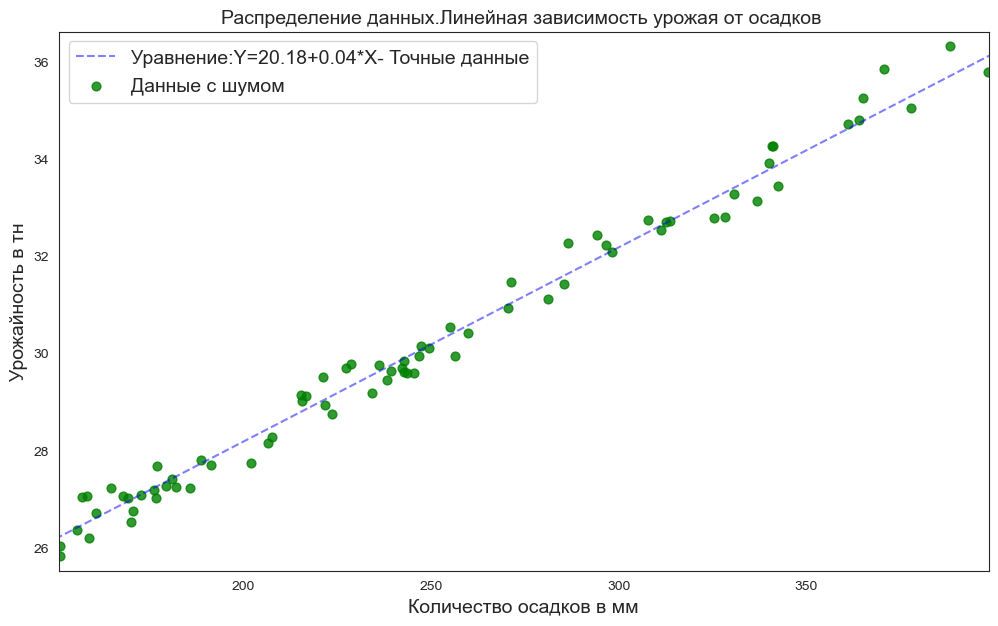

In [5]:
data = generate_wave_set(1000, 75)
print ('Shape of X is', data['x_train'].shape)
print ('Head of X is', data['x_train'][:10])
margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='Уравнение:Y=20.18+0.04*X- Точные данные')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='Данные с шумом')
plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper left', prop={'size': 14})
plt.title('Распределение данных.Линейная зависимость урожая от осадков ', fontsize=14)
plt.rcParams['figure.figsize'] = 12, 6
plt.xlabel('Количество осадков в мм',fontsize=14)
plt.ylabel('Урожайность в тн',fontsize=14)
plt.show()

Добавляястолбец единиц в первую позицию и используя нормальное уравнение для нахождения параметров модели построим наш прогноз.

Верхние 5 значений  X
[[  1.         151.25125125]
 [  1.         151.25125125]
 [  1.         155.75575576]
 [  1.         157.25725726]
 [  1.         158.50850851]]
Параметры прогноза
[20.04269539  0.04053987]


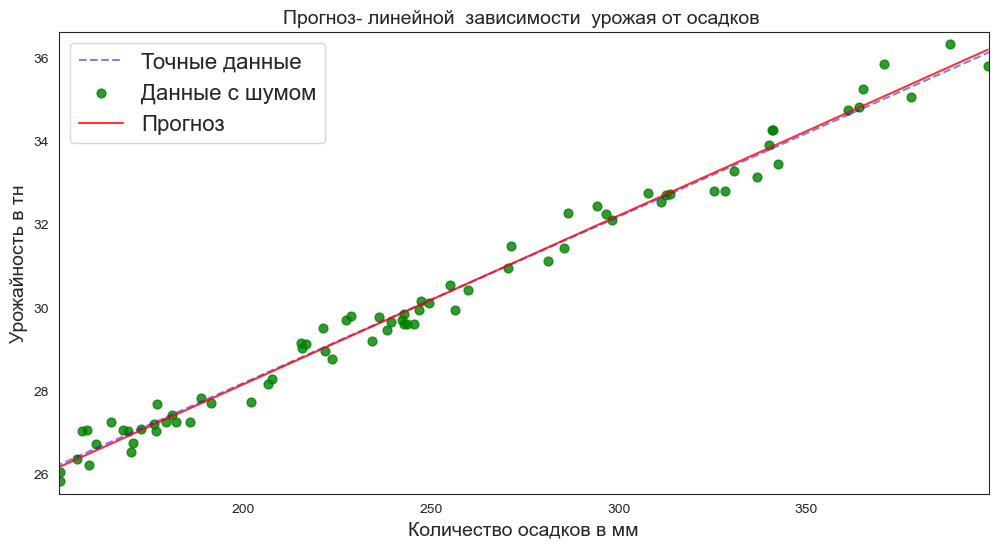

In [6]:
X = np.array([np.ones(data['x_train'].shape[0]), data['x_train']]).T
print('Верхние 5 значений  X') 
print(X[:5, :])
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), data['y_train'])
print('Параметры прогноза') 
print(w) 
y_hat = np.dot(w, X.T)

margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='Точные данные')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='Данные с шумом')

plt.plot(data['x_train'], y_hat, 'r', alpha=0.8, label='Прогноз')

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper left', prop={'size': 16})
plt.title('Прогноз- линейной  зависимости  урожая от осадков ', fontsize=14)
plt.xlabel('Количество осадков в мм',fontsize=14)
plt.ylabel('Урожайность в тн',fontsize=14)
plt.show()

Вычислим теперь среднеквадратичное отклонение между прогнозом  и обучающими  данными

In [7]:
z=np.mean((data['y_train'] - y_hat)**2)
print('z=',z)

z= 0.10649236229772552


Построим снова прогноз с применением линейной регресии

Top rows of X
[[  1.         151.25125125]
 [  1.         151.25125125]
 [  1.         155.75575576]
 [  1.         157.25725726]
 [  1.         158.50850851]]
Параметры прогноза
[20.04269539  0.04053987]


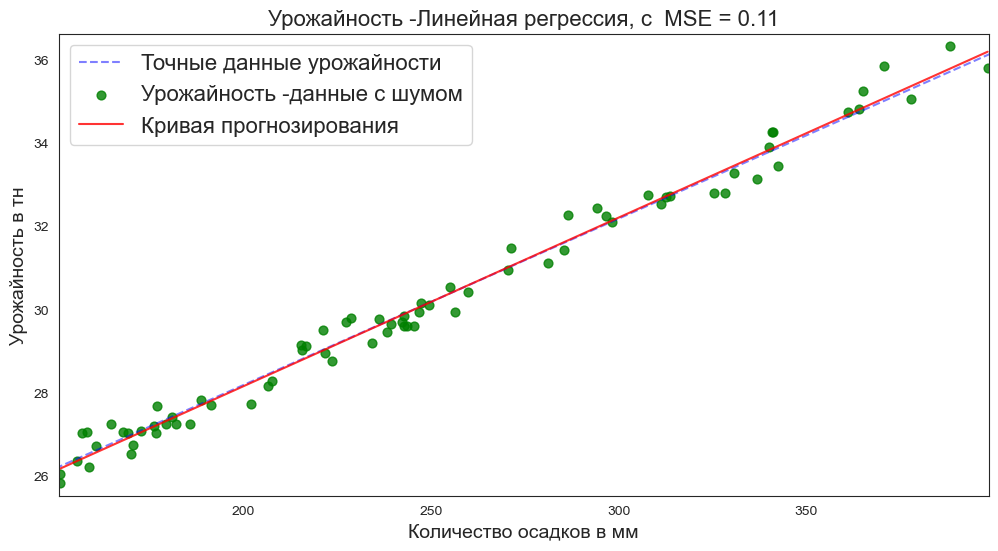

In [8]:
X = np.array([np.ones(data['x_train'].shape[0]), data['x_train']]).T
print('Top rows of X') 
print(X[:5, :])
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), data['y_train'])
print('Параметры прогноза') 
print(w) 
y_hat = np.dot(w, X.T)

margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='Точные данные урожайности')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='Урожайность -данные с шумом')

plt.plot(data['x_train'], y_hat, 'r', alpha=0.8, label='Кривая прогнозирования ')

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper left', prop={'size': 16})
plt.title("Урожайность -Линейная регрессия, с  MSE = %.2f" % np.mean((data['y_train'] - y_hat)**2), fontsize=16)
plt.xlabel('Количество осадков в мм',fontsize=14)
plt.ylabel('Урожайность в тн',fontsize=14)
plt.show()

## Нелинейная регрессия.
Построим теперь нелинейную модель.Рассмотрим задачу  будет ли урожайность выше среднего или нет.Ответ будет да=1 и нет =0 .Это задача логистической регрессии.Будем основываться на логистической функции сигмоид.

In [24]:
%matplotlib inline
import numpy as np
np.random.seed(12345)
import seaborn as sns
# set style
# sns.set_style("dark")
sns.set_style("white")
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['figure.facecolor'] = 'white'

In [25]:
def generate_wave_set(n_support=1000, n_train=50, std=0.3):
    data = {}
    data['support'] = np.linspace(-5, 5, num=n_support)   
    data['values'] = 1/(1+np.exp(-data['support']))
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    data['y_train'] = 1/(1+np.exp(-data['x_train'])) + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data

Shape of X is (50,)
Head of X is [-4.76976977 -4.70970971 -4.63963964 -4.56956957 -4.22922923 -4.18918919
 -4.08908909 -3.94894895 -3.81881882 -3.75875876]


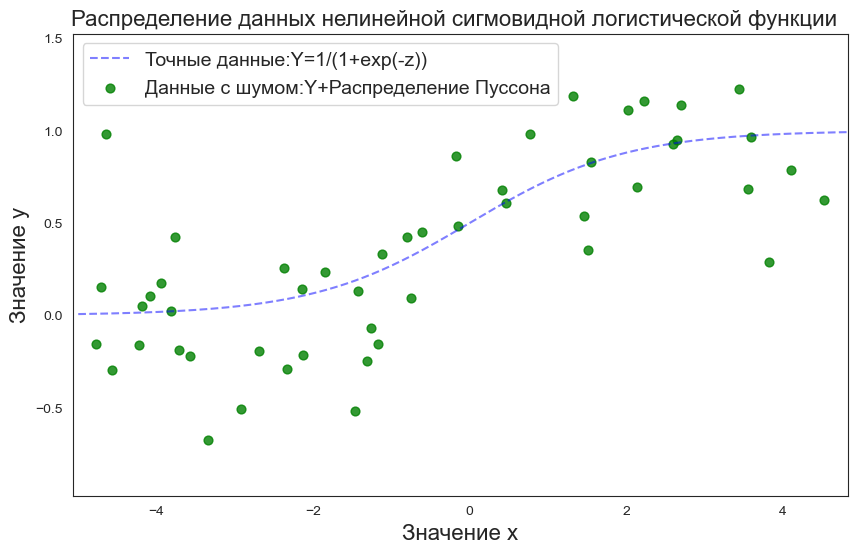

In [26]:
# выборка 35 точек из 1000, доступных из шумового многообразия ошибок
data = generate_wave_set(1000, 50)

print ('Shape of X is', data['x_train'].shape)
print ('Head of X is', data['x_train'][:10])

margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='Точные данные:Y=1/(1+exp(-z))')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='Данные с шумом:Y+Распределение Пуссона')
plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper left', prop={'size': 14})
plt.title('Распределение данных нелинейной сигмовидной логистической функции  ', fontsize=16)
plt.xlabel('Значение x',fontsize=16)
plt.ylabel('Значение y',fontsize=16)
plt.show()

Top rows of X
[[ 1.         -4.76976977]
 [ 1.         -4.70970971]
 [ 1.         -4.63963964]
 [ 1.         -4.56956957]
 [ 1.         -4.22922923]]
Параметры прогноза
[0.43371006 0.1285225 ]


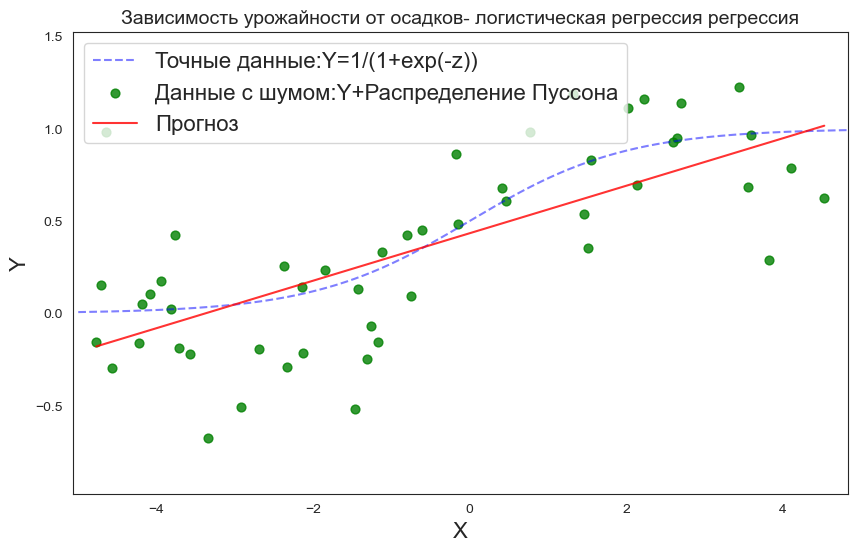

In [27]:
# add column of ones to the first position
X = np.array([np.ones(data['x_train'].shape[0]), data['x_train']]).T
print('Top rows of X') 
print(X[:5, :])
# linear algebra magic of numpy
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), data['y_train'])
print('Параметры прогноза') 
print(w) 
y_hat = np.dot(w, X.T)

margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='Точные данные:Y=1/(1+exp(-z))')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='Данные с шумом:Y+Распределение Пуссона')

plt.plot(data['x_train'], y_hat, 'r', alpha=0.8, label='Прогноз')

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper left', prop={'size': 16})
plt.title('Зависимость урожайности от осадков- логистическая регрессия регрессия', fontsize=14)
plt.xlabel('X',fontsize=16)
plt.ylabel('Y',fontsize=16)
plt.show()

Подсчитаем отклонения среднего от прогнозирумого 

In [21]:
y=np.mean((data['y_train'] - y_hat)**2)

In [22]:
print(y)

0.08229091474439873


Top rows of X
[[ 1.         -4.76976977]
 [ 1.         -4.70970971]
 [ 1.         -4.63963964]
 [ 1.         -4.56956957]
 [ 1.         -4.22922923]]
Параметры прогноза
[0.43371006 0.1285225 ]


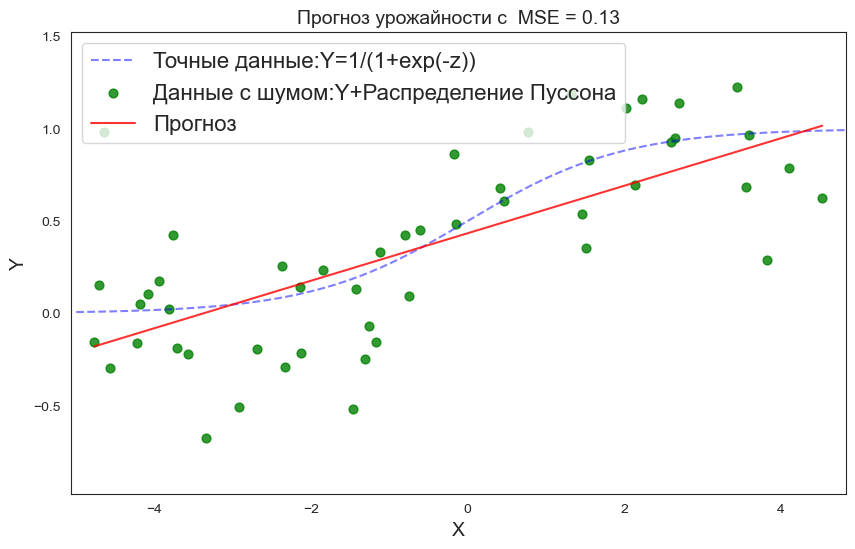

In [29]:
X = np.array([np.ones(data['x_train'].shape[0]), data['x_train']]).T
print('Top rows of X') 
print(X[:5, :])
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), data['y_train'])
print('Параметры прогноза') 
print(w) 
y_hat = np.dot(w, X.T)
margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='Точные данные:Y=1/(1+exp(-z))')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='Данные с шумом:Y+Распределение Пуссона')
plt.plot(data['x_train'], y_hat, 'r', alpha=0.8, label='Прогноз')
plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper left', prop={'size': 16})
plt.title("Прогноз урожайности с  MSE = %.2f" % np.mean((data['y_train'] - y_hat)**2), fontsize=14)
plt.xlabel('X',fontsize=14)
plt.ylabel('Y',fontsize=14)
plt.show()

# Полиномиальная регрессия

Расширим множество гипотез до множества всех полиномов степени $\large p$. Для количества признаков $\large m = 1$ множество гипотез будет:
$$\large \begin{array}{rcl} \forall h \in \mathcal{H}, h\left(x\right) &=& w_0 + w_1 x + w_1 x^2 + \cdots + w_n x^p \\
&=& \sum_{i=0}^p w_i x^i
\end{array}$$

В остальном ничего не поменялось.

In [ ]:
Сделаем прогноз с примпнением полиномами степеней 1,4 и 15 соответственно.

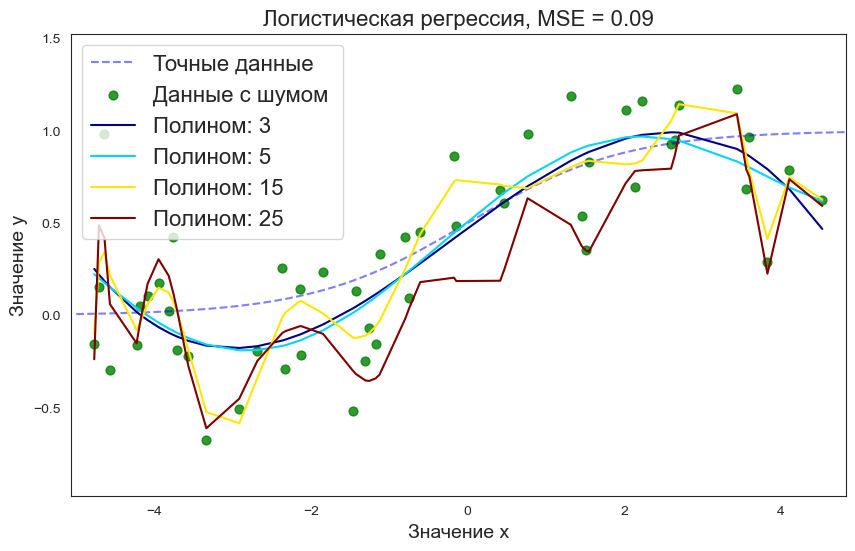

In [30]:
# Определяем список со степенями полиномов для исследования
degree_list = [3, 5, 15,25]
# get color palette
cmap = plt.get_cmap('jet')
#Вычислим индивидуальный цвет для каждой кривой
colors = [cmap(i) for i in np.linspace(0, 1, len(degree_list))]

margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='Точные данные')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='Данные с шумом ')

# Сохраним веса всех подобранных полиномиальных регрессий
w_list = []
err = []
for ix, degree in enumerate(degree_list):
    # Список с полиномиальными признаками для каждой степени
    dlist = [np.ones(data['x_train'].shape[0])] + \
            list(map(lambda n: data['x_train']**n, range(1, degree + 1)))
    X = np.array(dlist).T
    w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), data['y_train'])
    w_list.append((degree, w))
    y_hat = np.dot(w, X.T)
    err.append(np.mean((data['y_train'] - y_hat)**2))
    plt.plot(data['x_train'], y_hat, color=colors[ix], label='Полином: %i' % degree)

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper left', prop={'size': 16})
plt.title("Логистическая регрессия, MSE = %.2f" % np.mean((data['y_train'] - y_hat)**2), fontsize=16)
plt.xlabel('Значение x',fontsize=14)
plt.ylabel('Значение y',fontsize=14)
plt.show() 

Как видим в этом случае результаты неутешительные

In [99]:
y=np.mean((data['y_train'] - y_hat)**2)
print(y)

0.05885457384490267


In [80]:
for p, e in zip(degree_list, err):
    print(p, e) 

3 0.08369106764560483
5 0.08228042990282396
15 0.053794067305487504


C:\Users\User\anaconda3\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\User\anaconda3\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


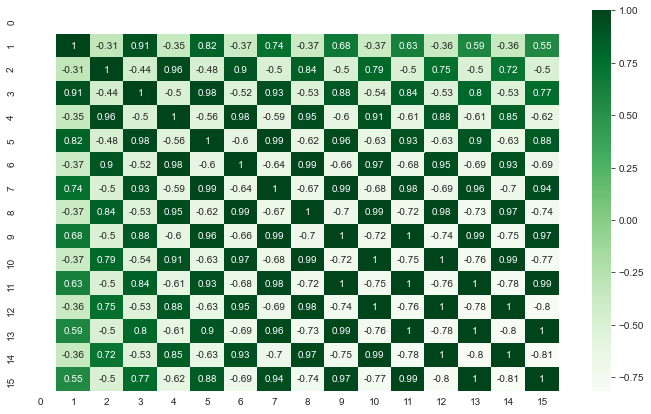

In [81]:
import seaborn as sns
sns.heatmap(np.corrcoef(X.T),cmap='Greens',annot=True);

In [82]:
# eigenvalues for poly-12 features, we can see multicollinearity
np.linalg.eigvals(np.cov(X[:, 1:-1].T))

array([ 5.05712993e+17,  8.61414256e+15,  3.95466851e+12,  1.20754910e+11,
        3.15427906e+08,  9.68935815e+06,  7.63930246e+04,  4.64196679e+03,
        1.30200171e+02,  9.73708965e+00, -5.58918577e-01,  2.23602464e-02,
        2.89417556e-01,  4.29687541e-01])

Как видим многие корни комплесные.Матрица в данном случае сильно коррелировано.Обратной матрицы не существует.

In [83]:
np.linalg.eigvals(np.cov(X[:, 1:].T))

array([ 1.19599922e+19,  1.60617208e+17,  8.03223612e+13,  1.62225006e+12,
        5.74070848e+09,  1.17194947e+08,  1.10582142e+06,  2.81916221e+04,
        1.38636016e+03,  4.24428582e+01, -1.19949358e+01,  5.33601149e+00,
       -5.87234054e-01,  2.99581168e-01,  1.82208357e-01])

Для тестирование на линейную зависимость или мультиколлинеарность можно исползовать число обусловленности матрицы $X^T X$. Число обусловленности равно отношению большего собственного числа к меньшему. Большое число определенности или наличие близких к нулю собственных чисел является признаком мультиколлинеарности.

К сожалению инвертирование $X^T X$ при нечеткой мультиколлинеарности численно нестабильно, но существует решение. Вспомним, что любую полноранговую матрицу $X$ размера $n \times m$ можно представить в виде:
$$\Large X = QR$$
где
- $Q^T Q = E$
- $R$ треугольная матрица размера $m \times m$

$$\large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \vec{w}} = 0 &\Leftrightarrow& \frac{1}{2n} \left(-2 X^T \vec{y} + 2X^T X \vec{w}\right) = 0 \\
&\Leftrightarrow& -X^T \vec{y} + X^T X \vec{w} = 0 \\
&\Leftrightarrow& X^T X \vec{w} = X^T \vec{y} \\
&\Leftrightarrow& \left(QR\right)^T \left(QR\right) \vec{w} = \left(QR\right)^T \vec{y} \\
&\Leftrightarrow& R^T \left(Q^T Q\right) R \vec{w} = R^T Q^T \vec{y} \\
&\Leftrightarrow& R^T R \vec{w} = R^T Q^T \vec{y} \\
&\Leftrightarrow& \left(R^T\right)^{-1} R^T R \vec{w} = \left(R^T\right)^{-1}  R^T Q^T \vec{y} \\
&\Leftrightarrow& R \vec{w} = Q^T \vec{y} \\
&\Leftrightarrow& \vec{w} = \left(R\right)^{-1} Q^T \vec{y} \\
\end{array}$$

Треугольная матрица легко инвертируется, поэтому решение заметно стабильнее. Если бы нам был интересен только прогноз, то можно было бы и не выводить значения параметров модели:

$$\large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \vec{w}} = 0 &\Leftrightarrow& \frac{1}{2n} \left(-2 X^T \vec{y} + 2X^T X \vec{w}\right) = 0 \\
&\Leftrightarrow& R \vec{w} = Q^T \vec{y} \\
&\Leftrightarrow& Q R \vec{w} = Q Q^T \vec{y} \\
&\Leftrightarrow& X \vec{w} = Q Q^T \vec{y} \\
\end{array}$$

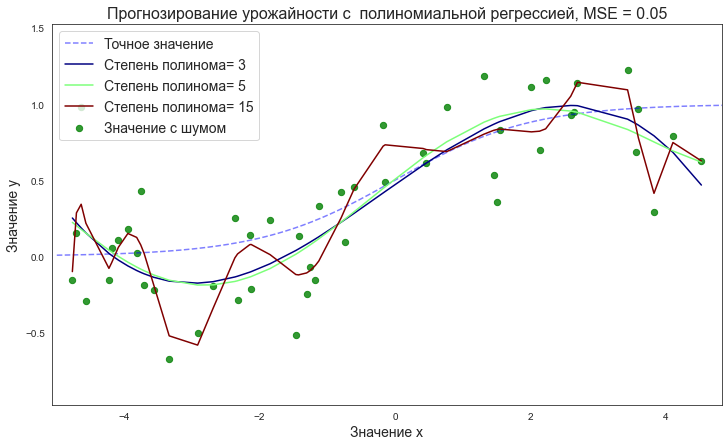

In [84]:
# define list with degrees of polynomials to investigate
degree_list = [3, 5, 15]
# get color palette
cmap = plt.get_cmap('jet')
# compute individual color for each curve
colors = [cmap(i) for i in np.linspace(0, 1, len(degree_list))]

margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='Точное значение')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='Значение с шумом ')

# save weights of all fitted polynomial regressions
w_list = []
err = []
for ix, degree in enumerate(degree_list):
    # list with polynomial features for each degree
    dlist = [np.ones(data['x_train'].shape[0])] + \
            list(map(lambda n: data['x_train']**n, range(1, degree + 1)))
    X = np.array(dlist).T
    q, r = np.linalg.qr(X)
    w = np.dot(np.dot(np.linalg.inv(r), q.T), data['y_train'])
    w_list.append((degree, w))
    y_hat = np.dot(w, X.T)
    err.append(np.mean((data['y_train'] - y_hat)**2))
    plt.plot(data['x_train'], y_hat, color=colors[ix], label='Степень полинома= %i' % degree)

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper left', prop={'size': 14})
plt.title("Прогнозирование урожайности с  полиномиальной регрессией, MSE = %.2f" % (np.mean((data['y_train'] - y_hat)**2)),fontsize=16)
# plt.title('Полиномиальное прогнозирование', fontsize=20)
plt.xlabel('Значение x',fontsize=14)
plt.ylabel('Значение y',fontsize=14)
plt.show() 

Посмотрим на значение параметров, которые получились в результате применения алгоритма обучения:

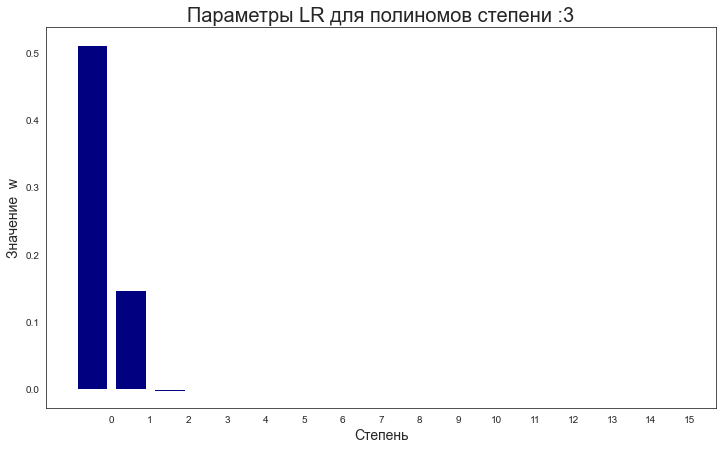

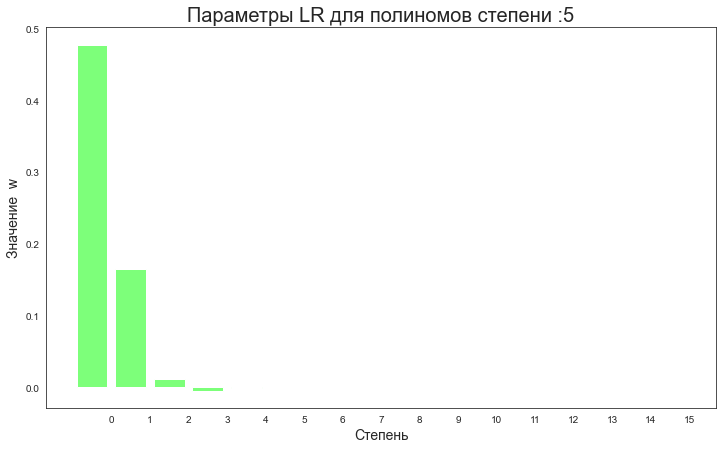

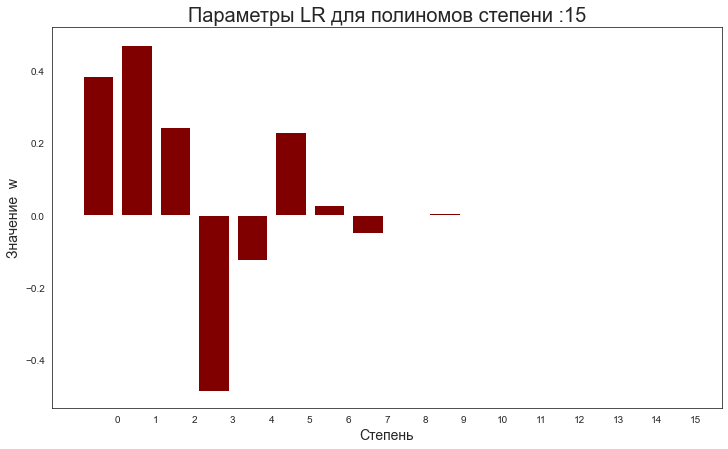

In [20]:
for ix, t in enumerate(w_list):
    degree, w = t
    fig, ax = plt.subplots()
    plt.bar(range(max(degree_list) + 1), np.hstack((w, [0]*(max(degree_list) - w.shape[0] + 1))), color=colors[ix])
    plt.title('Параметры LR для полиномов степени :%i' % degree, fontsize=20)
    plt.xlabel('Степень',fontsize=14)
    plt.ylabel('Значение  w',fontsize=14)
    ax.set_xticks(np.array(range(max(degree_list) + 1)) + 0.5)
    ax.set_xticklabels(range(max(degree_list) + 1))
    plt.show()

# Регуляризация

Симптомы переобучения видны невооруженным взглядом: выученная функция интерполирует данные (старается пройти чуть ли не через каждую точку данных). Так же мы видим, что абсолютные значения весов растут вместе с увеличением степени полинома. Что если мы наложим какой-нибудь штраф на амплитуду весов? В общем случае штраф выглядит следующим образом:
$$\large \mathcal{L}_{reg} \left(X, \vec{y}, \vec{w}\right) = \mathcal{L}\left(X, \vec{y}, \vec{w}\right) + \lambda R\left(\vec{w}\right)$$
где:
* $\large \lambda$ - это параметр регуляризации.

# $L_2$ регуляризация

Попробуем добавить ограничение на $L_2$ норму вектора параметров модели:

$$\large R\left(\vec{w}\right) = \frac{1}{2} \left\| \vec{w} \right\|_2^2 = \frac{1}{2} \sum_{j=1}^m w_j^2 = \frac{1}{2} \vec{w}^T \vec{w}$$

тогда целевая функция примет вид:

$$\large \mathcal{L}\left(X, \vec{y}, \vec{w} \right) = \frac{1}{2} \left(\vec{y} - X \vec{w}\right)^T \left(\vec{y} - X \vec{w}\right) + \frac{\lambda}{2} \vec{w}^T \vec{w}$$

Как и раньше, продифференцируем по параметрам $\large \vec{w}$:
$$\large \begin{array}{rcl}\Large \frac{\partial \mathcal{L}}{\partial \vec{w}} &=& \frac{\partial}{\partial \vec{w}} \left(\frac{1}{2} \left(\vec{y} - X \vec{w}\right)^T \left(\vec{y} - X \vec{w}\right) + \frac{\lambda}{2} \vec{w}^T \vec{w}\right) \\
&=& \frac{\partial}{\partial \vec{w}}\left( \frac{1}{2} \left( \vec{y}^T \vec{y} -2\vec{y}^T X \vec{w} + \vec{w}^T X^T X \vec{w}\right) + \frac{\lambda}{2} \vec{w}^T \vec{w} \right) \\
&=& -X^T \vec{y} + X^T X \vec{w} + \lambda \vec{w}
\end{array}$$

и найдем решение:
$$\large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \vec{w}} = 0 &\Leftrightarrow& -X^T \vec{y} + X^T X \vec{w} + \lambda \vec{w} = 0 \\
&\Leftrightarrow& X^T X \vec{w} + \lambda \vec{w} = X^T \vec{y} \\
&\Leftrightarrow& \left(X^T X + \lambda E\right) \vec{w} = X^T \vec{y} \\
&\Leftrightarrow& \vec{w} = \left(X^T X + \lambda E\right)^{-1} X^T \vec{y}
\end{array}$$

Такая регрессия называется гребневой регрессией (ridge regression). При увеличении параметра регуляризации, матрица $X^T X + \lambda E$ становится "менее сингулярной", т.е. **регулярной**, а задача становится более определенной. Для такой матрицы число обусловленности будет равно: $\dfrac{e_\text{max}+λ}{e_\text{min}+λ}$, где $e_x$ — это собственные числа матрицы. Таким образом, увеличивая параметр регуляризации мы уменьшаем число обусловленности.

<img src="./images/l2reg.png" />

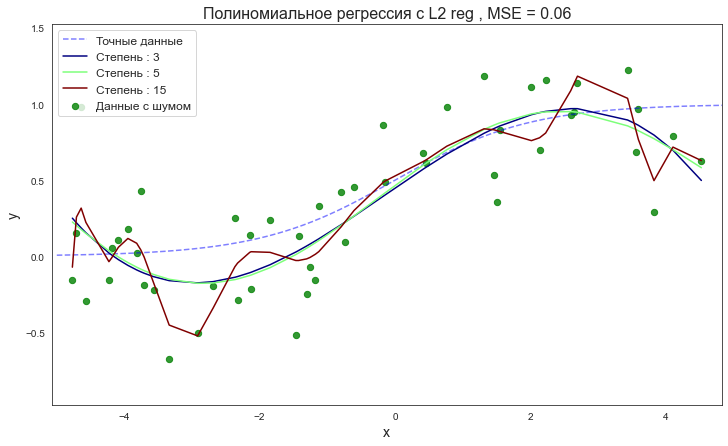

In [97]:
# define regularization parameter
lmbd = 1

degree_list = [3,5, 15]
cmap = plt.get_cmap('jet')
colors = [cmap(i) for i in np.linspace(0, 1, len(degree_list))]

margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='Точные данные')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='Данные с шумом')

w_list_l2 = []
err = []
for ix, degree in enumerate(degree_list):
    dlist = [[1]*data['x_train'].shape[0]] + list(map(lambda n: data['x_train']**n, range(1, degree + 1)))
    X = np.array(dlist).T
    w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X) + lmbd*np.eye(X.shape[1])), X.T), data['y_train'])
    w_list_l2.append((degree, w))
    y_hat = np.dot(w, X.T)
    plt.plot(data['x_train'], y_hat, color=colors[ix], label='Степень : %i' % degree)
    err.append(np.mean((data['y_train'] - y_hat)**2))
   

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper left', prop={'size': 12})
plt.title("Полиномиальное регрессия с L2 reg , MSE = %.2f" % (np.mean((data['y_train'] - y_hat)**2)),fontsize=16)
# plt.title('Fitted polynomial regressions with L2 reg', fontsize=20)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.show() 

In [98]:
for p, e in zip(degree_list, err):
    print(p, e) 

3 0.0839476911525833
5 0.08282709699574908
15 0.05885457384490267


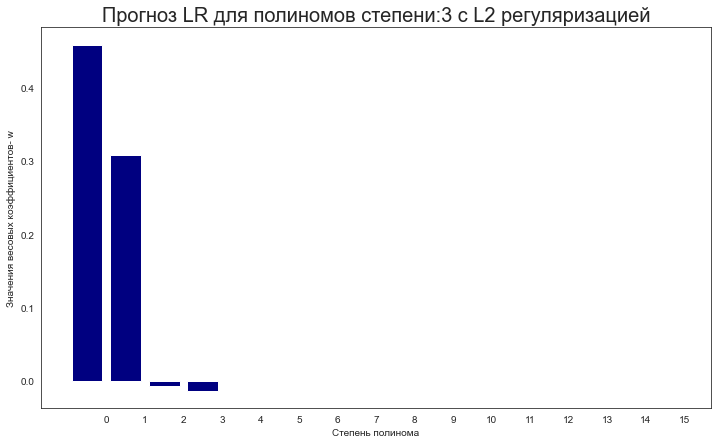

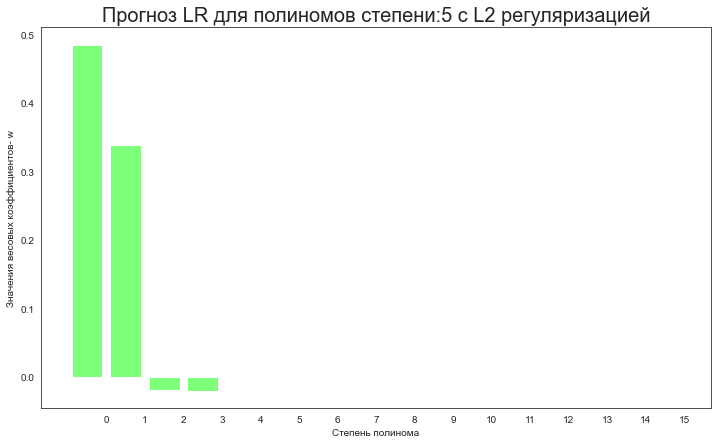

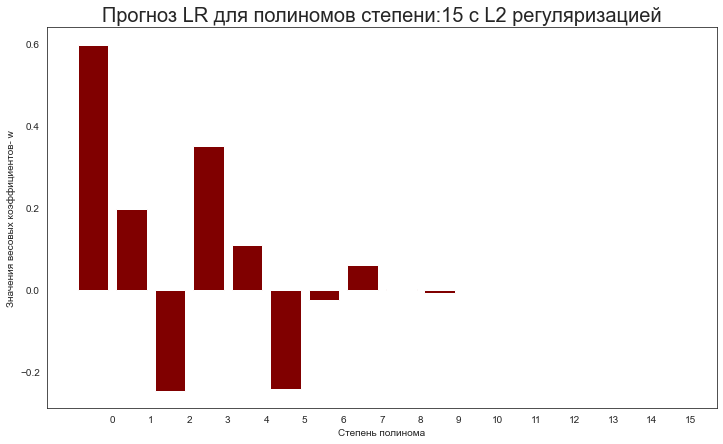

In [88]:
for ix, t in enumerate(w_list_l2):
    degree, w = t
    fig, ax = plt.subplots()
    plt.bar(range(max(degree_list) + 1), np.hstack((w, [0]*(max(degree_list) - w.shape[0] + 1))), color=colors[ix])
    plt.title('Прогноз LR для полиномов степени:%i с L2 регуляризацией' % degree, fontsize=20)
    plt.xlabel('Степень полинома')
    plt.ylabel('Значения весовых коэффициентов- w')
    ax.set_xticks(np.array(range(max(degree_list) + 1)) + 0.5)
    ax.set_xticklabels(range(max(degree_list) + 1))
    plt.show()

# $L_1$ регуляризация
<center>или LASSO (least absolute shrinkage and selection operator)</center>

Добавим ограничение на $L_1$ норму вектора параметров:

$$\large R\left(\vec{w}\right) = \left\| \vec{w} \right\|_1 = \sum_{j=1}^m \left| w_j \right|$$

целевая функция примет вид:

$$\large \mathcal{L}\left(X, \vec{y}, \vec{w} \right) = \frac{1}{2n} \sum_{i=1}^n \left(\vec{x_i}^T \vec{w} - y_i\right)^2 + \lambda \sum_{j=1}^m \left| w_j \right|$$

К сожалению, задача в этом виде не имеет общего аналитического решения, но мы можем воспользоваться методом градиентного спуска для поиска оптимального значения параметров модели:

$$\large \frac{\partial \mathcal{L}}{\partial w_j} = \frac{1}{n}\sum_{i=1}^n \left(\vec{x_i}^T \vec{w} - y_i\right) \vec{x_i} + \lambda \text{sign}(\vec{w})$$

Формула для итеративного обновления весов:
$$\large \vec{w}_{\text{new}} := \vec{w} - \alpha \frac{\partial \mathcal{L}}{\partial \vec{w}}$$
где:
* $\large \alpha$ - это скорость обучения или размер градиентного шага.

In [89]:
lmbd = 1
degree = 13
dlist = [[1]*data['x_train'].shape[0]] +list(map(lambda n: data['x_train']**n, range(1, degree + 1))) 
X = np.array(dlist).T

# define MSE function to evaluate model
# we expect that durint training process this value will be decreasing
def mse(u, v):
    return ((u - v)**2).sum()/u.shape[0]

# initial weights of the model
w = np.array([-1.0] * X.shape[1])
# maximim number of iterations
n_iter = 20
# alpha or learning rate
lr = 0.00000001
# we will keep all MSE values to plot graph
loss = []
for ix in range(n_iter):
    w -= lr*(np.dot(np.dot(X, w) - data['y_train'], X)/X.shape[0] + lmbd*np.sign(w))
    y_hat = np.dot(X, w)
    loss.append(mse(data['y_train'], y_hat))
    print( loss[-1])

1.3472225053326084e+33
9.439238779100156e+49
6.613604548317266e+66
4.633823366193863e+83
3.246689279987114e+100
2.2747935015575334e+117
1.5938345275680096e+134
1.1167204845312818e+151
7.824304336502512e+167
5.482100417984863e+184
3.841034768121481e+201
2.6912217881884803e+218
1.88560509093297e+235
1.3211495888436687e+252
9.25663726988655e+268
6.48566477784309e+285
4.544182340102656e+302
inf
inf
inf


<ipython-input-89-d175101e0b0a>:9: RuntimeWarning: overflow encountered in square
  return ((u - v)**2).sum()/u.shape[0]


# Стандардизация

Что бы избезать расхождения алгоритма градиентного спуска и выровнять амплитуду признаков мы можем привести все признаки к единому стандарту: что бы среднее значение признаков было равно нулю, а дисперсия единице. Для этого необлодимо из каждого признака вычесть свое среднее (по столбцу) и разрелить на стандартное отклонение. Параметры преобразования мы вычисляем на тренировочном наборе:

$$\large \begin{array}{rcl} \overline{\mu}_{\cdot j} &=& \frac{1}{n} \sum_{i=1}^n x_{ij} \\
\overline{\sigma}_{\cdot j} &=& \sqrt{\frac{1}{n} \sum_{i=1}^n \left( x_{ij} - \overline{\mu}_{\cdot j} \right)}
\end{array}$$

а применяем как к тренировочному, так и к тестовому:

$$\large \vec{x}_{\text{new}} = \frac{\vec{x} - \overline{\mu}}{\overline{\sigma}}$$

In [90]:
# import norm class from scipy
from scipy.stats import norm

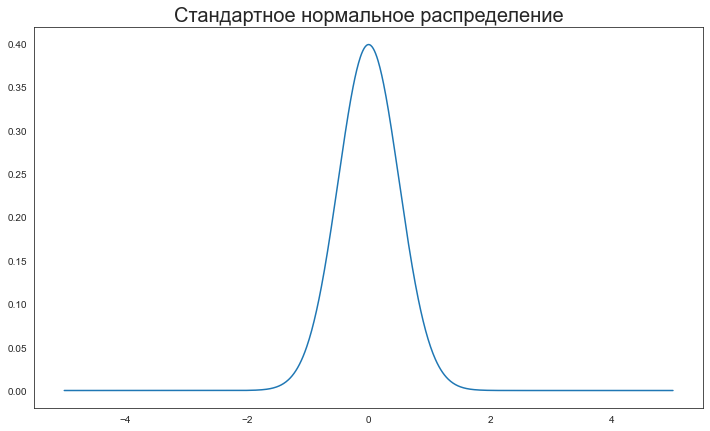

In [91]:
plt.plot(np.linspace(-5, 5, 1000), norm.pdf(np.linspace(-10, 10, 1000)))
plt.title('Стандартное нормальное распределение', fontsize=20)
plt.show()

X mean:
[ 1.00000000e+00 -3.37337337e-01  8.55109865e+00 -5.36400212e+00
  1.25408959e+02 -7.39440308e+01  2.16992507e+03 -1.08610024e+03
  4.08880137e+04 -1.77212520e+04  8.12323781e+05 -3.29154285e+05
  1.67535014e+07 -6.96163832e+06]
X std
[0.00000000e+00 2.90470346e+00 7.23102143e+00 4.62725897e+01
 1.58620953e+02 8.98251669e+02 3.47058014e+03 1.88254438e+04
 7.77814843e+04 4.12959919e+05 1.78289423e+06 9.33972423e+06
 4.15608141e+07 2.15671717e+08]


<ipython-input-44-dc1615d9dbe4>:14: RuntimeWarning: invalid value encountered in true_divide
  X = (X - x_mean)/x_std


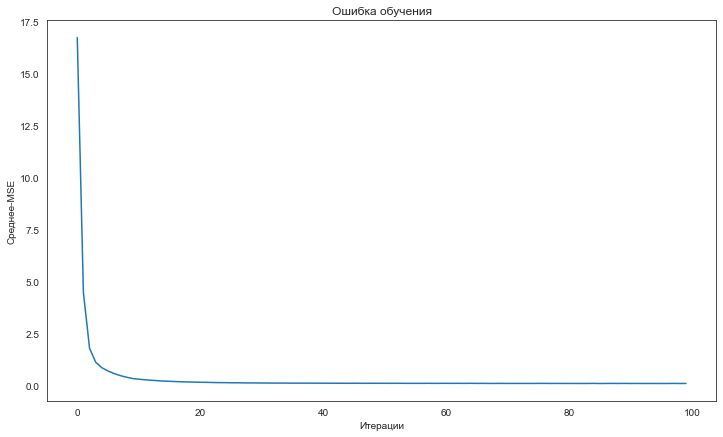

In [44]:
lmbd = 0.1
degree = 13
dlist = [[1]*data['x_train'].shape[0]] + list(map(lambda n: data['x_train']**n, range(1, degree + 1)))
X = np.array(dlist).T
# compute sample mean
x_mean = X.mean(axis=0)
print('X mean:') 
print( x_mean)
# compute sample std
x_std = X.std(axis=0)
print('X std') 
print(x_std)
# apply transformation
X = (X - x_mean)/x_std
# fix first column with ones
X[:, 0] = 1.0

def mse(u, v):
    return ((u - v)**2).sum()/u.shape[0]

w = np.array([-1.0] * X.shape[1])
n_iter = 100
lr = 0.1
loss = []
for ix in range(n_iter):
    w -= lr*(np.dot(np.dot(X, w) - data['y_train'], X)/X.shape[0] + lmbd*np.sign(w))
    y_hat = np.dot(X, w)
    loss.append(mse(data['y_train'], y_hat))

plt.plot(loss)
plt.title('Ошибка обучения')
plt.xlabel('Итерации')
plt.ylabel('Среднее-MSE')
plt.show()

Перепишем код $L_1$ регрессии:

<ipython-input-92-56b3c2f6c729>:28: RuntimeWarning: invalid value encountered in true_divide
  X = (X - x_mean)/x_std
<ipython-input-92-56b3c2f6c729>:28: RuntimeWarning: invalid value encountered in true_divide
  X = (X - x_mean)/x_std
<ipython-input-92-56b3c2f6c729>:28: RuntimeWarning: invalid value encountered in true_divide
  X = (X - x_mean)/x_std


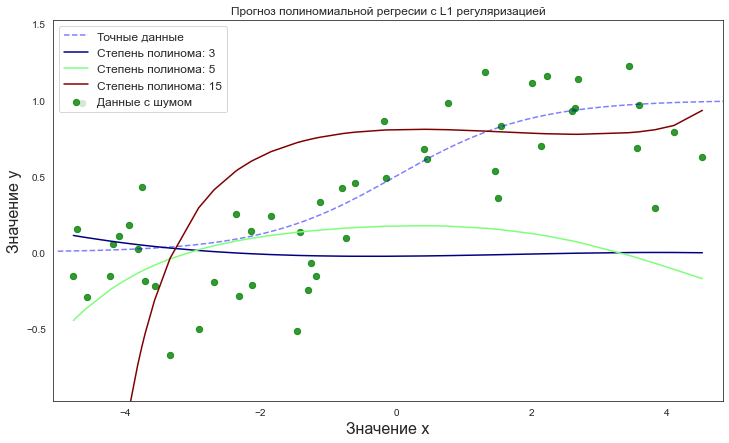

In [92]:
degree_list = [3, 5, 15]
cmap = plt.get_cmap('jet')
colors = [cmap(i) for i in np.linspace(0, 1, len(degree_list))]

margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='Точные данные')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='Данные с шумом')

def mse(u, v):
    return ((u - v)**2).sum()/u.shape[0]

def fit_lr_l1(X, y, lmbd, n_iter=100, lr=0.1):
    w = np.array([-1.0] * X.shape[1])
    loss = []
    for ix_iter in range(n_iter):
        w -= lr*(np.dot(np.dot(X, w) - y, X)/X.shape[0] +lmbd*np.sign(w))
        y_hat = np.dot(X, w)
        loss.append(mse(y, y_hat))
    return w, y_hat, loss
    
w_list_l1 = []
err = []
for ix, degree in enumerate(degree_list):
    dlist = [[1]*data['x_train'].shape[0]] + list(map(lambda n: data['x_train']**n, range(1, degree + 1)))
    X = np.array(dlist).T
    x_mean = X.mean(axis=0)
    x_std = X.std(axis=0)
    X = (X - x_mean)/x_std
    X[:, 0] = 1.0
    w, y_hat, loss = fit_lr_l1(X, data['y_train'], lmbd=lmbd)
    w_list_l1.append((degree, w))
    plt.plot(data['x_train'], y_hat, color=colors[ix], label='Степень полинома: %i' % degree)
    err.append(np.mean((data['y_train'] - y_hat)**2))
    

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper left', prop={'size': 12})
plt.title('Прогноз полиномиальной регресии с L1 регуляризацией')
plt.xlabel('Значение x',fontsize=16)
plt.ylabel('Значение y',fontsize=16)
plt.show() 

In [93]:
for p, e in zip(degree_list, err):
    print (p, e)

3 0.3830232619666779
5 0.36052906580302246
15 2.31701419448575


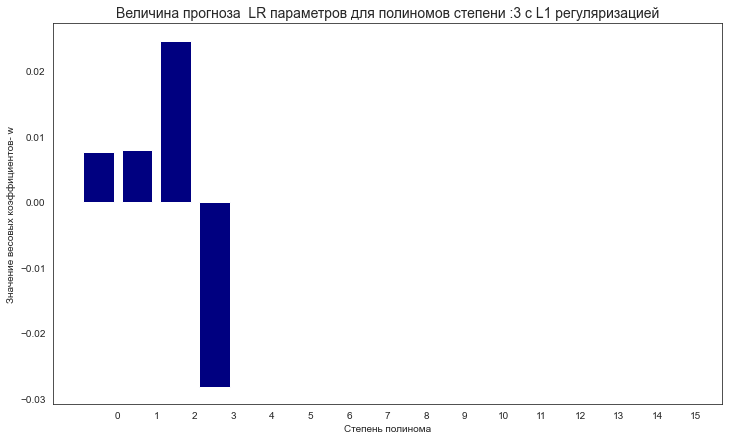

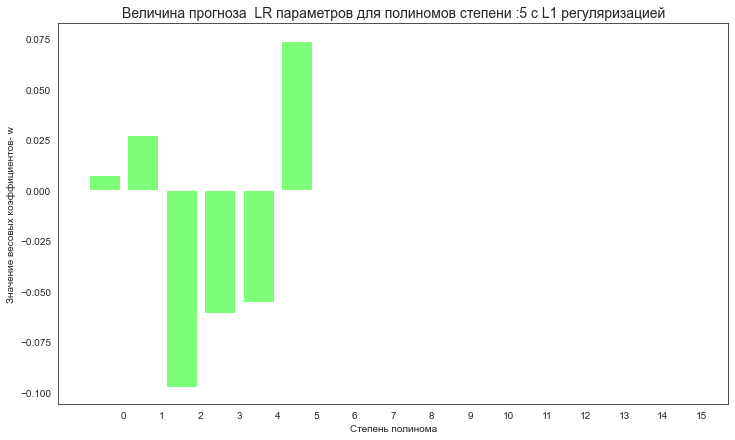

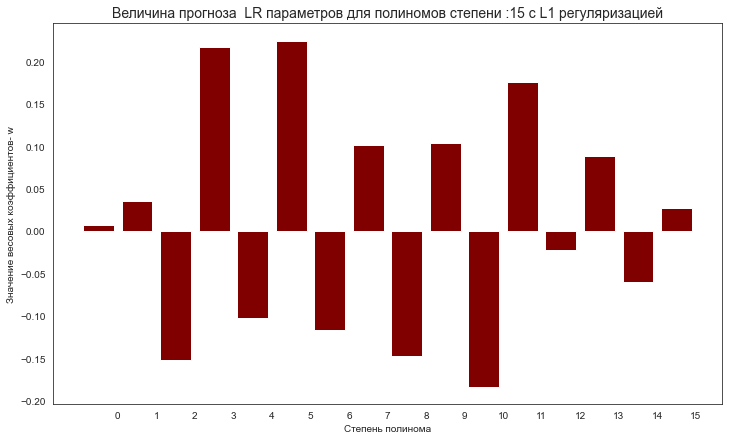

In [94]:
for ix, t in enumerate(w_list_l1):
    degree, w = t
    fig, ax = plt.subplots()
    plt.bar(range(max(degree_list) + 1), np.hstack((w, [0]*(max(degree_list) - w.shape[0] + 1))), color=colors[ix])
    plt.title('Величина прогноза  LR параметров для полиномов степени :%i с L1 регуляризацией' % degree, fontsize=14)
    plt.xlabel('Степень полинома')
    plt.ylabel('Значение весовых коэффициентов- w')
    ax.set_xticks(np.array(range(max(degree_list) + 1)) + 0.5)
    ax.set_xticklabels(range(max(degree_list) + 1))
    plt.show()